visualization for final presentation

---

In [62]:
import pandas as pd
import scipy as sp

In [60]:
#df = pd.read_csv('data/sentiment.csv')
df = pd.read_stata('data/sentiment-topic_diversity.dta')
df.head(2)

,level_0,index,type,disease,compound,neg,neu,pos,age,gender,role,role_binary,topic_diversity
0,0,0,q,psychiatric topics,-0.6515,0.123,0.776,0.101,32.0,0,patient,1,1.561658
1,1,2207,q,neurology topics,-0.9760,0.145,0.793,0.062,32.0,0,patient,1,0.086766


In [63]:
import seaborn as sns
sns.set_context('paper')
sns.set_style('white')

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

---

#### sentiment

In [64]:
female = df.query("gender==1")['compound'].mean()
male = df.query("gender==0")['compound'].mean()
female, male

(0.13275201560468142, 0.15504148794162143)

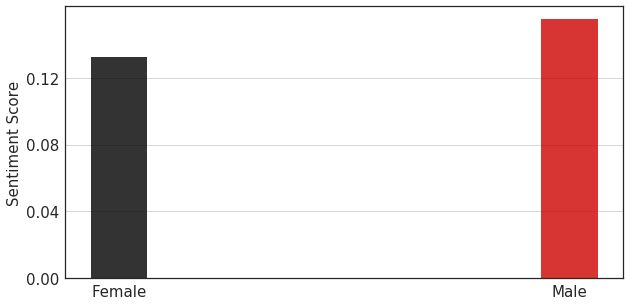

In [70]:
X = [-1., 1]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(X, [female, male], width=0.25,
       alpha=0.8,
       color=['k', '#CC0200'])
ax.grid(axis='y')
#ax.set_xticks([0, 1, 2, 3])
ax.set_xticks([-1, 1])
ax.set_ylabel('Sentiment Score', fontdict={'size': 15})
ax.set_yticks([0, 0.04, 0.08, 0.12])
ax.set_xticklabels(['Female', 'Male'])
_ = ax.tick_params(axis='both', which='major', labelsize=15)

In [72]:
p = df.query("role_binary==1")['compound'].mean()
d = df.query("role_binary==0")['compound'].mean()
p, d

(-0.1909993338884263, 0.40391536910044373)

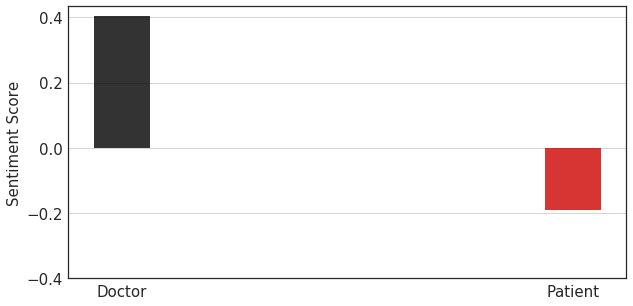

In [76]:
X = [-1., 1]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(X, [d, p], width=0.25,
       alpha=0.8,
       color=['k', '#CC0200'])
ax.grid(axis='y')
#ax.set_xticks([0, 1, 2, 3])
ax.set_xticks([-1, 1])
ax.set_ylabel('Sentiment Score', fontdict={'size': 15})
ax.set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
ax.set_xticklabels(['Doctor', 'Patient'])
_ = ax.tick_params(axis='both', which='major', labelsize=15)

bar chart for 4: f,m x p,d

In [77]:
fp = df.query("gender==1 and role_binary==1")['compound'].mean()
fd = df.query("gender==1 and role_binary==0")['compound'].mean()
md = df.query("gender==0 and role_binary==0")['compound'].mean()
mp = df.query("gender==0 and role_binary==1")['compound'].mean()
fp, fd, md, mp

(-0.22614308956725931,
 0.5781584721065779,
 0.2936448030562508,
 -0.13353167855183762)

In [ ]:
stat

In [78]:
X = pd.np.arange(4)

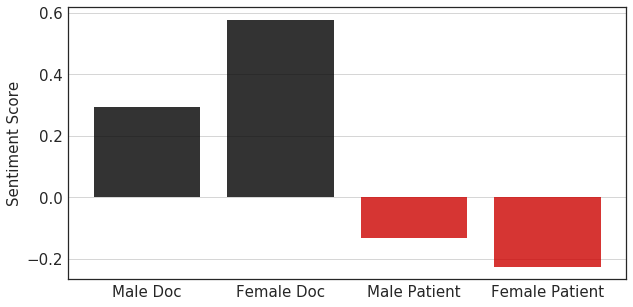

In [79]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(X, [md, fd, mp, fp], 
       alpha=0.8,
       color=['k', 'k', '#CC0200', '#CC0200'])
ax.grid(axis='y')
ax.set_xticks([0, 1, 2, 3])
ax.set_ylabel('Sentiment Score', fontdict={'size': 15})
ax.set_yticks([-0.2, 0, 0.2, 0.4, 0.6])
ax.set_xticklabels(['Male Doc', 'Female Doc', 
                    'Male Patient', 'Female Patient'])
_ = ax.tick_params(axis='both', which='major', labelsize=15)

---

#### topical diversity

topic modeling

In [83]:
lda_coh_df = pd.read_csv('data/topic_coherence.csv')
lda_coh_df

,coherence,num_topics
0,-2.158152,100
1,-2.163577,110
2,-2.174580,120
3,-2.139994,130
4,-2.152813,140
5,-2.170055,150


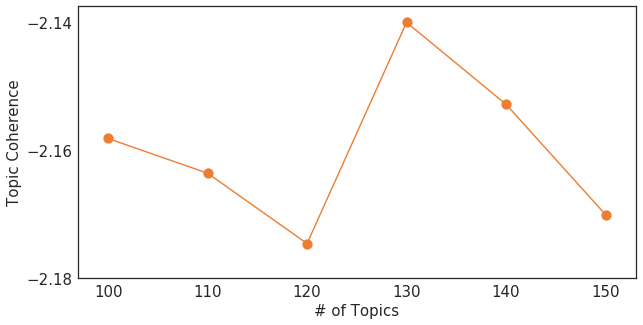

In [94]:
fig, ax = plt.subplots(figsize=(10, 5))
lda_coh_df.plot(x='num_topics', y='coherence', kind='line', 
                #color='#CC0200', ax=ax, legend=None)
                color='#ED7D32', ax=ax, legend=None)
lda_coh_df.plot(x='num_topics', y='coherence', kind='scatter', 
                color='#ED7D32', ax=ax, s=100)
                #color='#CC0200', ax=ax, s=100)
ax.set_yticks([-2.180, -2.160, -2.140])
ax.set_ylabel('Topic Coherence', fontdict={'size': 15})
ax.set_xlabel('# of Topics', fontdict={'size': 15})
_ = ax.tick_params(axis='both', which='major', labelsize=15)

In [85]:
fp = df.query("gender==1 and role_binary==1")['topic_diversity'].mean()
fd = df.query("gender==1 and role_binary==0")['topic_diversity'].mean()
md = df.query("gender==0 and role_binary==0")['topic_diversity'].mean()
mp = df.query("gender==0 and role_binary==1")['topic_diversity'].mean()
fp, fd, md, mp

(1.0957305539378497,
 1.0861653421238169,
 1.0919410021021196,
 1.0947089357012112)

In [31]:
X = pd.np.arange(4)

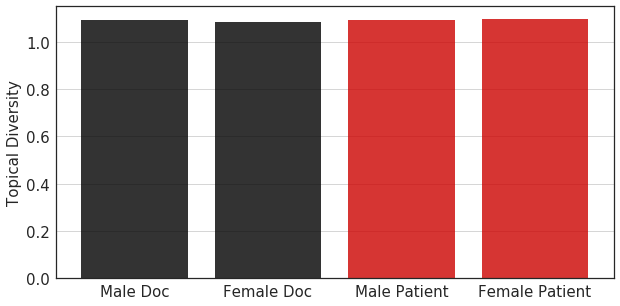

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(X, [md, fd, mp, fp], 
       alpha=0.8,
       color=['k', 'k', '#CC0200', '#CC0200'])
ax.grid(axis='y')
ax.set_xticks([0, 1, 2, 3])
ax.set_ylabel('Topical Diversity', fontdict={'size': 15})
#ax.set_yticks([-0.2, 0, 0.2, 0.4, 0.6])
ax.set_xticklabels(['Male Doc', 'Female Doc', 
                    'Male Patient', 'Female Patient'])
_ = ax.tick_params(axis='both', which='major', labelsize=15)

---

#### politenness

In [27]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://zhiyzuo@localhost:5432/ic2s2_datathon')

In [39]:
text_df = pd.read_sql_table(table_name='text', con=engine)
text_df = text_df[['post_user_id', 'politeness', 'disease']].rename(columns={'post_user_id': 'user_id'})
text_df.head(2)

,user_id,politeness,disease
0,TigerShot,0.75,psychiatric topics
1,marcia smith,0.66,psychiatric topics


In [33]:
user_df = pd.read_sql_table(table_name='user', con=engine)
user_df = user_df[['user_id', 'gender', 'role']]
user_df.head(2)

,user_id,gender,role
0,"Faye Lang, RN, MSW",Female,Nurse
1,Tim W Latsko,Male,Psychotherapist


merge user

In [53]:
polite_df = text_df.merge(user_df, on='user_id', how='left')
polite_df.head(2)

,user_id,politeness,disease,gender,role
0,TigerShot,0.75,psychiatric topics,Male,patient
1,marcia smith,0.66,psychiatric topics,Female,patient


In [54]:
polite_df.dropna(subset=['politeness'], inplace=True, axis=0)
polite_df = polite_df[~polite_df.politeness.isnull()]

In [55]:
polite_df.role = polite_df.role.str.contains('patient').astype(int)
polite_df.gender = polite_df.gender.map({'Male': 1, 'Female': 0})

In [56]:
polite_df.role.value_counts()

0    12395
1     9605
Name: role, dtype: int64

In [57]:
polite_df.gender.value_counts()

1    11237
0    10763
Name: gender, dtype: int64

In [82]:
fp = polite_df.query("gender==1")['politeness'].mean()
fd = polite_df.query("gender==1")['politeness'].mean()
md = polite_df.query("gender==0 and role==0")['politeness'].mean()
mp = polite_df.query("gender==0 and role==1")['politeness'].mean()
fp, fd, md, mp

(0.7348601206801976,
 0.8012053747859307,
 0.7679850124895921,
 0.6975566370196341)

In [82]:
fp = polite_df.query("gender==1 and role==1")['politeness'].mean()
fd = polite_df.query("gender==1 and role==0")['politeness'].mean()
md = polite_df.query("gender==0 and role==0")['politeness'].mean()
mp = polite_df.query("gender==0 and role==1")['politeness'].mean()
fp, fd, md, mp

(0.7348601206801976,
 0.8012053747859307,
 0.7679850124895921,
 0.6975566370196341)